# Logistic Regression #

#### Ani to Fernando, September 2019 ###

Observations 1 and 2 below lead to the Data 100 story for logistic regression. I think they are clear and also better as motivation that what currently exists in the Data 100 text. It might be a good way to start. It is definitely part of a probabilistic interpretation of logistic regression.

## 1. Log-Likelihood and Cross-Entropy Loss ##

Let $Y_1, Y_2, \ldots, Y_n$ be an independent sequence where $Y_i$ has the Bernoulli $(p_i)$ distribution.

Write $y = [y_1, y_2, \ldots, y_n]$ for observed values of this sequence, and let $p$ denote the unknown parameter vector $[p_1, p_2, \ldots, p_n]$.

The likelihood of $p_1$ given $y_1$ is

$$
l(p_1 \mid y_1) = 
\begin{cases}
p_1 ~~~~~~~~~~ \text{if } y_1 = 1 \\
1-p_1 ~~~ \text{if } y_1 = 0
\end{cases}
$$

This is written more compactly as

$$
l(p_1 \mid y_1) ~ = ~ p_1^{y_1}(1-p_1)^{1-y_1}
$$

By independence, the likelihood of $p$ given the entire sample $y$ is

$$
l(p \mid y) ~ = ~ \prod_{i=1}^n p_i^{y_i}(1 - p_i)^{1-y_i}
$$

The log-likelihood is

$$
\mathscr{l}(p \mid y) ~ = ~ \sum_{i=1}^n \big{(} y_i\log(p_i) + (1-y_i)\log(1-p_i) \big{)}
$$

### Cross-Entropy

Let's consider for a minute the generic definition of cross-entropy loss, for an arbitrary pair of probability distributions $a$ and $b$; from Data 100 you may recall that the cross-entropy loss $H(a, b)$ is defined as

$$
H(a, b) = - \frac{1}{n} \sum_{i=1}^n a_i \log(b_i)
$$

Now, let's see carefully how to apply this generic definition to our situation, where $a$ is our set of observations $y$ and $b$ is our probability model $p$. Note that the sum above over $i$ has to run over every observation. As stated above, our probability model is for a binary variable, and thus has only two cases for each observation $i$:

$$
b_i = 
\begin{cases}
p_i ~~~~~~~~~~ \text{if } y_i = 1 \\
1-p_i ~~~ \text{if } y_i = 0
\end{cases}
$$

$$
a_i \log(b_i) = 
\begin{cases}
\log(p_i) ~~~~~~~~~~ \text{if } y_i = 1 \\
\log(1-p_i) ~~~ \text{if } y_i = 0
\end{cases}
$$

which can be written as (knowing that only one of them can be true for any given $i$, since $y_i$ is either 0 or 1):

$$
a_i \log(b_i) = y_i\log(p_i) + (1-y_i)\log(1-p_i) 
$$

We then have:

$$
H(y, p) = - \frac{1}{n} \sum_{i=1}^n \big{(} y_i\log(p_i) + (1-y_i)\log(1-p_i) \big{)}
$$

Finding $p$ that minimizes the cross-entropy loss is the same as finding $p$ that maximizes likelihood:

$$
H(y, p) ~ = ~ - \frac{1}{n} \sum_{i=1}^n \big{(} y_i\log(p_i) + (1-y_i)\log(1-p_i) \big{)}
~ = ~ -\frac{1}{n} \mathscr{l}(p \mid y)
$$

## 2. $p_i$ as a Function of $\mathbf{X}_i$ ##

For a general numerical $Y_i$, we know how to predict it by a linear function of $\mathbf{X}$. This doesn't work when $Y_i \in \{0, 1\}$.

Consider instead the odds ratio 

$$
\frac{p_i}{1-p_i}.
$$

This is close to 0 when $p_i$ is small, and huge if $p_i$ is large, so perhaps we can model this instead. 

In [24]:
def odds(p):
    return p/(1-p)

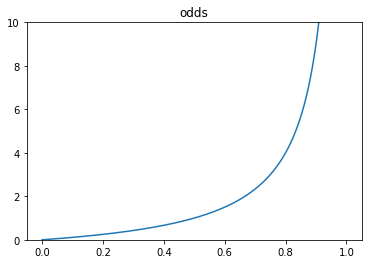

In [25]:
%pylab inline

eps = 0.0001
p = np.linspace(eps, 1-eps, 2000)

plt.plot(p, odds(p));
plt.title("odds");
plt.ylim(0, 10);

From the plot above, we see that the odds ratio is a stronlgy non-linear function that is also strictly non-negative. It's a poor candidate for modeling by linear functions of $\mathbf{X}$. Let's consider the log odds ratio instead:

$$
\log\big{(} \frac{p_i}{1-p_i} \big{)}
$$

This has values in $(-\infty, \infty )$.

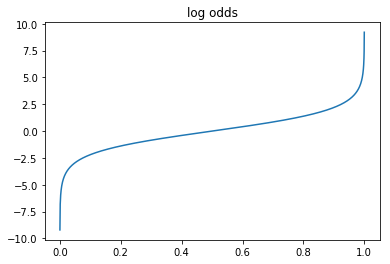

In [26]:
plot(p, log(odds(p)));
plt.title("log odds");

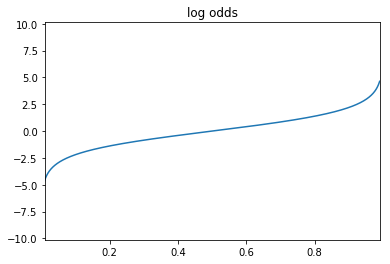

In [28]:
plot(p, log(odds(p)));
plt.title("log odds");
eps2 = 0.01
plt.xlim(eps2, 1-eps2);

What if we model this as a linear function of $\mathbf{X}$? 
 
In the notation of Data 100, let $f_\theta(\mathbf{X})$ be a linear function of $\mathbf{X}$, and let

$$
\log\big{(} \frac{p_i}{1-p_i} \big{)} ~ = ~ f_\theta(\mathbf{X}_i)
$$

Then

$$
\frac{p_i}{1-p_i} ~ = ~ e^{f_\theta(\mathbf{X}_i)}
$$

so 

$$
p_i ~ = ~ \frac{e^{f_\theta(\mathbf{X}_i)}}{1+e^{f_\theta(\mathbf{X}_i)}}
~ = ~ \frac{1}{1 + e^{-f_\theta(\mathbf{X}_i)}} ~ = ~ \sigma(f_\theta(\mathbf{X}_i))
$$

where 

$$
\sigma(t) ~ = ~ \frac{1}{1 + e^{-t}}
$$

is the sigmoid function.

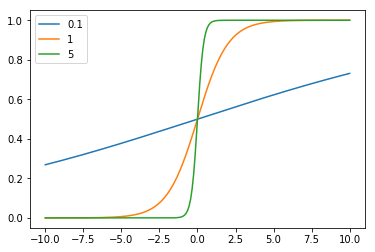

In [34]:
def σ(t, k=1):
    return 1/(1+np.exp(-k*t))

a = 10
t = linspace(-a, a, 200)

for k in [0.1, 1, 5]:
    plt.plot(t, σ(t, k), label=f'{k}');
plt.legend();

As we saw in detail (with a lot of algebra) [in Data100](http://www.ds100.org/sp18/assets/lectures/lec21/21-classification_v2.pptx), the logistic regression problem then becomes finding $\theta$ to maximize the log likelihood function

$$
\mathscr{l}(\theta \mid \mathbf{X}, y) ~ = ~ \sum_{i=1}^n \big{(} y_i\log(f_\theta(\mathbf{X}_i)) + (1-y_i)\log(1-f_\theta(\mathbf{X}_i)) \big{)}
$$

or equivalently to minimize the cross-entropy loss

$$
L(\theta \mid \mathbf{X}, y) ~ = ~ \frac{1}{n} \sum_{i=1}^n \big{(} -y_i\log(f_\theta(\mathbf{X}_i)) - (1-y_i)\log(1-f_\theta(\mathbf{X}_i)) \big{)}
$$